In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud

pd.set_option('display.max_rows', None)

In [2]:
with open('../data/processed/yatsenko_morph_words_processed.json', 'r', encoding='utf-8') as f:
    words = json.load(f).get('words', None)

In [3]:
words_df = pd.DataFrame({'raw_words': words})

In [4]:
words_df['morphemes'] = words_df['raw_words'].apply(lambda x: x.split('/'))
words_df['n_morphemes'] = words_df['morphemes'].apply(lambda x: len(x))
words_df['n_letters'] = words_df['raw_words'].apply(lambda x: len(x)) - words_df['n_morphemes'] + 1

words_df['letter_by_morphemes'] = words_df['n_letters']/words_df['n_morphemes']

In [5]:
morphemes = words_df['morphemes'].explode().reset_index(drop=True)

In [6]:
morphemes_val_count = morphemes.value_counts().reset_index()

In [7]:
len(morphemes_val_count)

17843

In [8]:
morphemes_val_count[:20]

,morphemes,count
0,ий,33397
1,ти,31179
2,а,21855
3,н,20294
4,о,15379
5,я,13869
6,ува,11530
7,к,10030
8,и,9125
9,по,8401


In [9]:
words_df.head(10)

,raw_words,morphemes,n_morphemes,n_letters,letter_by_morphemes
0,абажур/н/ий,"[абажур, н, ий]",3,9,3.000000
1,абажур/чик,"[абажур, чик]",2,9,4.500000
2,абаз/ин/ець,"[абаз, ин, ець]",3,9,3.000000
3,абаз/ин/к/а,"[абаз, ин, к, а]",4,8,2.000000
4,абаз/ин/ськ/ий,"[абаз, ин, ськ, ий]",4,11,2.750000
5,абат/ис/а,"[абат, ис, а]",3,7,2.333333
6,абат/ств/о,"[абат, ств, о]",3,8,2.666667
7,абат/ськ/ий,"[абат, ськ, ий]",3,9,3.000000
8,абдомін/альн/ий,"[абдомін, альн, ий]",3,13,4.333333
9,абдук/тор,"[абдук, тор]",2,8,4.000000


# Analysis

In [10]:
print(f"Total words - {len(words_df)}")

Total words - 117393


In [11]:
print(f"Total morphemes - {len(morphemes)}")

Total morphemes - 467868


In [12]:
print(f"Avg morphemes per word - {words_df['n_morphemes'].mean()}")

Avg morphemes per word - 3.9854846541105515


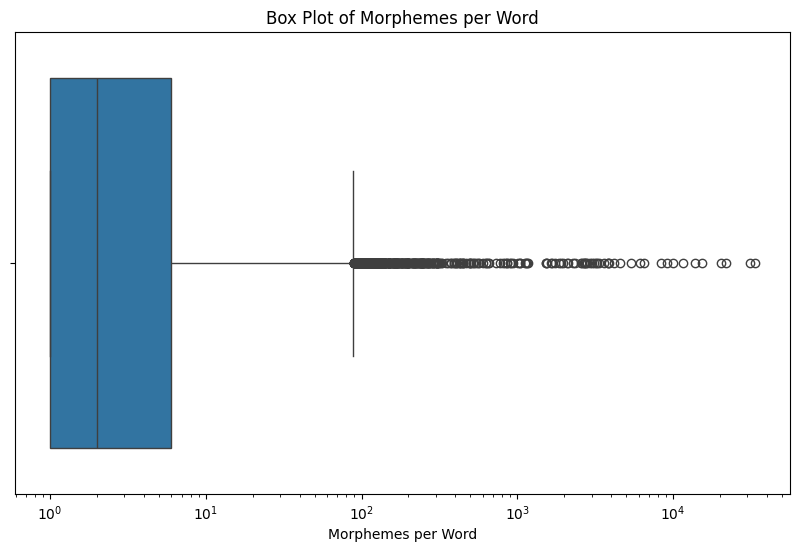

In [13]:
plt.figure(figsize=(10, 6))

# Box plot
sns.boxplot(x=morphemes_val_count['count'], log_scale=True)

# Labels and title
plt.xlabel("Morphemes per Word")
plt.title("Box Plot of Morphemes per Word")

plt.show()

### Number of morphemes

In [14]:
n_morphemes_value_counts = words_df['n_morphemes'].value_counts()

In [15]:
n_morphemes_value_counts.head()

n_morphemes
4    42955
3    29509
5    26161
2     9403
6     6895
Name: count, dtype: int64

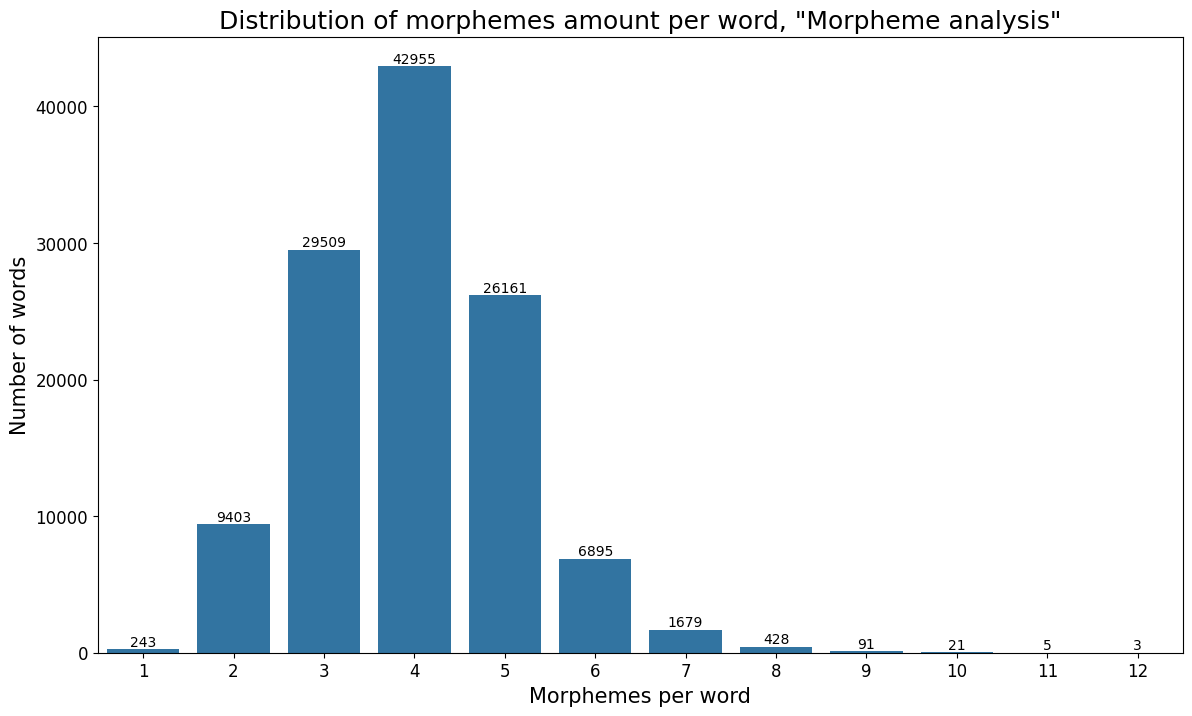

In [24]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart
sns.barplot(n_morphemes_value_counts, ax=ax)

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,  # X position
            p.get_height(),  # Y position
            int(p.get_height()),  # Text (count)
            ha='center', va='bottom', fontsize=10)  # Alignment

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
# Labels and title
ax.set_xlabel("Morphemes per word", fontsize=15)
ax.set_ylabel("Number of words", fontsize=15)
ax.set_title("Distribution of morphemes amount per word, \"Morpheme analysis\"", fontsize=18)

# Set y-axis ticks
# ax.set_yticks(np.arange(0, n_morphemes_value_counts.max() + 5000, 5000))

plt.show()

### WordCloud

In [17]:
text = ','.join(morphemes_val_count.loc[:50, 'morphemes'])
text

'ий,ти,а,н,о,я,ува,к,и,по,нн,за,ов,ість,ен,ви,на,роз,юва,ся,пере,і,з,в,при,про,не,від,ик,у,с,ськ,під,об,ин,ну,л,енн,ч,ова,до,ва,льн,т,ок,ник,е,ат,ець,лив,иц'

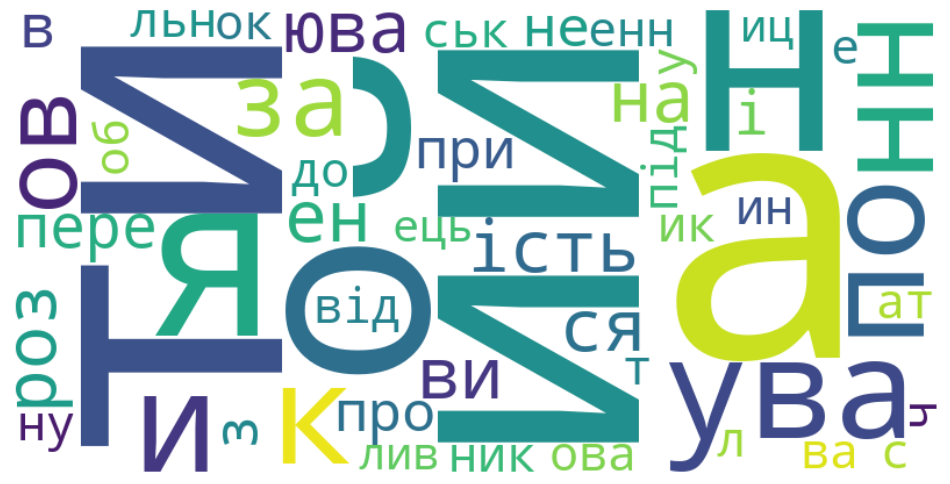

In [18]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axis
plt.show()

## Save vocabulary

In [20]:
morphemes_val_count.to_csv('../data/vocabulary/yatsenko_vocabulary_with_counts.csv', index=False)